<h1 style="text-align: center">
Machine Learning HW1 </br>
MLE & MAP in Python
</h1>

#### Name: Fateme Raeijian

#### Std. Number: 402203389

## Objective
This exercise will help you gain a deeper understanding of, and insights into, Maximum Likelihood Estimation (MLE) and Maximum A Posteriori (MAP) estimation$\textit{Maximum Likelihood Estimation (MLE) and Maximum A Posteriori (MAP) }$ :) \\
Let’s say you have a barrel of apples that are all different sizes. You pick an apple at random, and you want to know its weight. Unfortunately, all you have is a broken scale. answer the questions below.

1) For the sake of this section, lets imagine a farmer tells you that the scale returns the weight of the object with an error of +/- a standard deviation of 5g. We can describe this mathematically as:
$$
measurement = weight + \mathcal{N}(0, 5g)
$$
You can weigh the apple as many times as you want, so weigh it 100 times.
plot its histogram of your 100 measurements. (y axis is the counts and x-axis is the measured weight)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

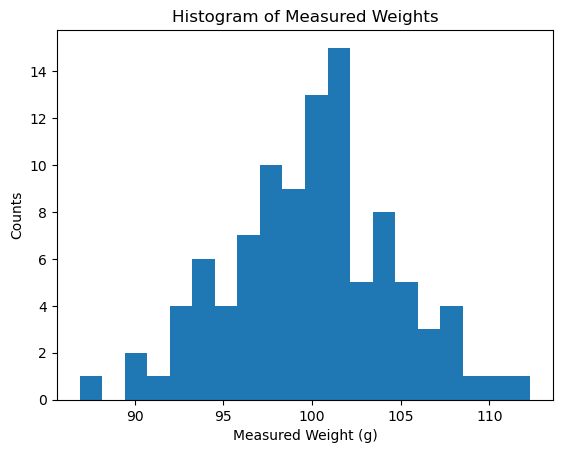

In [27]:
# Generate 100 measurements with a normal distribution
weight = 100  # True weight of the apple
error_std = 5  # Standard deviation of the measurement error
measurements = np.random.normal(loc=weight, scale=error_std, size=100)

# Plot the histogram
plt.hist(measurements, bins=20)
plt.xlabel('Measured Weight (g)')
plt.ylabel('Counts')
plt.title('Histogram of Measured Weights')
plt.show()

2) Find the average weight of the apple.
Is it a good guess? state your reason.
<br>

<div dir="rtl" style="font-family: BNazanin; text-align: justify;">
در این موقعیت، میانگین وزن سیب بر اساس 100 اندازه‌گیری، نزدیک به 100 (وزن واقعی در نظر گرفته شده برای سیب) است. با فرض توزیع نرمال با انحراف معیار 5 گرم برای خطاهای اندازه‌گیری، میانگین وزن یک تخمین مناسب از وزن واقعی سیب است. با این حال، باید محدودیت‌ها و احتمال وجود انحرافات و تغییرات ناشی از عملیات اندازه‌گیری و توزیع اصلی وزن سیب را در نظر بگیریم.
</div>
    

In [28]:
import numpy as np

average_weight = np.mean(measurements)
print("Average weight:", average_weight, "g")

Average weight: 99.9462332594963 g


3) we are going to use grid approximation for calculating the MLE. here is the link if you wnat to get more fimilar with this technique:
https://www.bayesrulesbook.com/chapter-6

Our end goal is to find the weight of the apple, given the data we have. To formulate it in a Bayesian way: We’ll ask what is the probability of the apple having weight, $w$, given the measurements we took, $X$. And, because we're formulating this in a Bayesian way, we use Bayes’ Law to find the answer:

$$
P(w|X) = \frac{P(X|w)P(w)}{P(X)}
$$

If we make no assumptions about the initial weight of our apple, then we can drop $P(w)$. We’ll say all sizes of apples are equally likely (we’ll revisit this assumption in the MAP approximation).

Furthermore, we’ll drop $P(X)$ - the probability of seeing our data. This is a normalization constant and will be important if we do want to know the probabilities of apple weights. But, for right now, our end goal is to only to find the most probable weight. $P(X)$ is independent of $w$, so we can drop it if we’re doing relative comparisons.

This leaves us with $P(X|w)$, our likelihood, as in, what is the likelihood that we would see the data, $X$, given an apple of weight $w$. If we maximize this, we maximize the probability that we will guess the right weight.

The grid approximation is probably the simplest way to do this. Basically, we’ll systematically step through different weight guesses, and compare what it would look like if this hypothetical weight were to generate data. We’ll compare this hypothetical data to our real data and pick the one that matches the best.

To formulate this mathematically:

For each of these guesses, we’re asking "what is the probability that the data we have, came from the distribution that our weight guess would generate". Because each measurement is independent from another, we can break the above equation down into finding the probability on a per measurement basis:

$$
P(X|w) = \prod_{i}^{N} p(x_i|w)
$$

So, if we multiply the probability that we would see each individual data point - given our weight guess - then we can find one number comparing our weight guess to all of our data.

The peak in the likelihood is the weight of the apple.

To make it computationally easier,

$$
\log P(X|w) = \log \prod_{i}^{N} p(x_i|w) = \sum_{i}^{N} \log p(d_i|w)
$$



a) Why did we use log likelihood? Is it ok to do so?

<div dir="rtl" style="font-family: BNazanin; text-align: justify;">
استفاده از likelihood به صورت لگاریتمی یک روش رایج در مدلسازی بیزی و تحلیل آماری است. برداشت لگاریتم از تابع likelihood چندین مزیت دارد.

</div>
<div dir="rtl" style="font-family: BNazanin; text-align: justify;">
اولاً، این عمل باعث ساده‌تر شدن محاسبات ریاضی می‌شود؛ زیرا ضرب احتمالات بسیار کوچک را به جمع لگاریتم‌ها تبدیل می‌کند. این کمک می‌کند تا مشکلات underflow عددی که در ضرب احتمالات بسیار کوچک به وجود می‌آید را جلوگیری کند.
</div>
<div dir="rtl" style="font-family: BNazanin; text-align: justify;">
ثانیاً، لگاریتم یک تابع یک‌به‌یک است، به این معنی که بیشینه کردن لگاریتم likelihood معادل بیشینه کردن تابع likelihood اصلی است. این ویژگی امکان کار با نمایش‌های لگاریتمی ساده و محاسباتی کارا را بدون تغییر نتایج فراهم می‌کند.
</div>

b) do the grid approximation and complete the cell below

<div dir="rtl" style="font-family: BNazanin;">

</div>

In [29]:
from scipy.stats import norm
import numpy as np

weight_grid = np.linspace(0, 100)
np.random.seed(42)
mean_weight = 100  # True weight of the apple
std_dev = 10  # Standard deviation for the generated weights
num_samples = 50  # Number of measurements
# Generate a random dataset centered around the true weight
data = np.random.normal(mean_weight, std_dev, num_samples).tolist()


# Calculate the log likelihoods for a range of weight guesses.
log_likelihoods = []
for weight_guess in weight_grid:
    log_pdf_values = norm.logpdf(data, loc=weight_guess, scale=10)
    total_log_likelihood = np.sum(log_pdf_values)
    log_likelihoods.append(total_log_likelihood)

# Find the maximum likelihood estimate.
mle_weight = weight_grid[np.argmax(log_likelihoods)]

print("Maximum Likelihood Estimate (MLE) of weight:", mle_weight)

Maximum Likelihood Estimate (MLE) of weight: 97.9591836734694


Play around with the code and try to answer the following questions regarding MLE and MAP. You can draw plots to visualize as well.

In [34]:
import numpy as np
from scipy.stats import norm, invgamma


# The barrel of apples
# The average apples is between 70-100 g
BARREL = np.random.normal(loc=85, scale=20, size=100)
# Grid
WEIGHT_GUESSES = np.linspace(1, 200, 100)
ERROR_GUESSES = np.linspace(.1, 50, 100)

# NOTE: Try changing the scale error
# in practice, you would not know this number
SCALE_ERR = 5

# NOTE: Try changing the number of measurements taken
N_MEASURMENTS = 10

# NOTE: Try changing the prior values and distributions
PRIOR_WEIGHT = norm(50, 1).logpdf(WEIGHT_GUESSES)
PRIOR_ERR = invgamma(4).logpdf(ERROR_GUESSES)

LOG_PRIOR_GRID = np.add.outer(PRIOR_ERR, PRIOR_WEIGHT)


def read_scale(apple):
    return apple + np.random.normal(loc=0, scale=SCALE_ERR)


def get_log_likelihood_grid(measurments):
    log_liklelihood = [
        [
            norm(weight_guess, error_guess).logpdf(measurments).sum()
            for weight_guess in WEIGHT_GUESSES
        ]
        for error_guess in ERROR_GUESSES
    ]
    return np.asarray(log_liklelihood)


def get_mle(measurments):
    log_likelihood_grid = get_log_likelihood_grid(measurements)
    max_likelihood_index = np.unravel_index(np.argmax(log_likelihood_grid), log_likelihood_grid.shape)
    weight_guess = WEIGHT_GUESSES[max_likelihood_index[1]]
    return weight_guess
    """
    Calculate the log-likelihood for each measurement in the grid.
    Find the index of the maximum log-likelihood in the grid.
    Return the weight guess corresponding to the maximum log-likelihood.
    """


def get_map(measurements):
    log_likelihood_grid = get_log_likelihood_grid(measurements)
    log_posterior_grid = log_likelihood_grid + LOG_PRIOR_GRID
    max_posterior_index = np.unravel_index(np.argmax(log_posterior_grid), log_posterior_grid.shape)
    weight_guess = WEIGHT_GUESSES[max_posterior_index[1]]
    return weight_guess
    """
    Calculate the log-likelihood for each measurement in the grid.
    Add the log prior to the log likelihood to get the log posterior.
    Find the index of the maximum log posterior in the grid.
    Return the weight guess corresponding to the maximum log posterior.
    """

# Pick an apple at random
apple = np.random.choice(BARREL)

# weight the apple
measurments = np.asarray([read_scale(apple) for _ in range(N_MEASURMENTS)])

print(f"Average measurement: {measurments.mean():.3f} g")
print(f"Maximum Likelihood estimate: {get_mle(measurments):.3f} g")
print(f"Maximum A Posterior estimate: {get_map(measurments):.3f} g")
print(f"The true weight of the apple was: {apple:.3f} g")

Average measurement: 86.570 g
Maximum Likelihood estimate: 99.495 g
Maximum A Posterior estimate: 51.253 g
The true weight of the apple was: 86.987 g


<h3><i><i> Questions</h3>
1.
How sensitive is the MAP measurement to the choice of prior?
    
<div dir="rtl" style="font-family: BNazanin; text-align: justify;">
    حساسیت اندازه‌گیری MAP نسبت به انتخاب prior می‌تواند به شکل‌های مختلفی تحت تأثیر قرار بگیرد. این حساسیت به عوامل زیر وابسته است:
    
1. **شکل توزیع prior**: اگر prior به شکلی باشد که مشخصاً به سمتی خاص بکشد، ممکن است تخمین MAP تحت تأثیر قرار گیرد. به عنوان مثال، اگر prior به سمت وزن‌های بزرگتر متمایل باشد، تخمین MAP به سمت وزن‌های بزرگتری متمایل می‌شود.
2. **پارامترهای توزیع prior**: پارامترهای توزیع prior مانند میانگین و انحراف معیار، نیز می‌توانند تأثیرگذار باشند. انتخاب میانگین و انحراف معیار مناسب بر اساس دانش و اطلاعات موجود درباره سیب‌ها، می‌تواند به تخمین MAP دقیق‌تری منجر شود.
3. **محتوای اطلاعات داده‌ها**: اگر داده‌ها قوی و کامل باشند و اطلاعات دقیقی درباره وزن سیب‌ها را ارائه کنند، prior کمتری در تخمین MAP تأثیر خواهد داشت. اما اگر داده‌ها محدود یا ناقص باشند، prior بیشتری در تخمین MAP تأثیر خواهد داشت.
</div>
<div dir="rtl" style="font-family: BNazanin; text-align: justify;">
به منظور ارزیابی حساسیت، می‌توان مجموعه‌ای از توزیع‌های prior مختلف را با فرضات متفاوت امتحان کرد و تأثیر آنها را بر تخمین MAP بررسی کرد. این نوع تحلیل می‌تواند کمک کند تا بهتر درک کنیم که انتخاب prior چگونه بر تخمین نهایی تأثیر می‌گذارد و نتایج به چه اندازه قابل اعتماد هستند.
</div>
<div dir="rtl" style="font-family: BNazanin; text-align: justify;">
به طور خلاصه، حساسیت اندازه‌گیری MAP نسبت به انتخاب prior در مسئله سیب‌ها به شکل، پارامترهای توزیع پیشین و محتوای اطلاعات داده‌ها بستگی دارد. بررسی حساسیت با استفاده از توزیع‌های پیشین مختلف می‌تواند به درک بهتری از تأثیر پیشین بر تخمین MAP و قابلیت اعتماد نتایج کمک کند.
</div>
    

<h3><i><i></h3>
2. How sensitive is the MLE and MAP answer to the grid size?
    
<div dir="rtl" style="font-family: BNazanin; text-align: justify;">
MLE و MAP نسبت به grid size می‌تواند در مسائل استنتاج و تخمین مبتنی بر grid متفاوت باشد.

</div>
<div dir="rtl" style="font-family: BNazanin; text-align: justify;">
در تخمین grid-based، اندازه grid به دقت یا نرمال‌سازی grid استفاده شده برای تقسیم فضای پارامترها اشاره دارد. حساسیت MLE و MAP به اندازه grid می‌تواند به وابستگی به مسئله خاص و ویژگی‌های داده و اطلاعات prior بستگی داشته باشد. در ادامه چند نکته را برای بررسی موضوع ارائه می‌دهیم:
    
1. **Resolution vs. Compurarional Complexity**: grid با سلول‌های کوچکتر می‌تواند تصویر دقیق‌تری از فضای پارامترها ارائه دهد. با این حال، همراه با افزایش دقت، پیچیدگی محاسباتی نیز افزایش می‌یابد؛ زیرا تعداد سلول‌های grid و محاسبات مورد نیاز به صورت نمایی با افزایش اندازه grid افزایش می‌یابد. بنابراین، معمولاً یک توازن بین سطح دقت مورد نظر و منابع محاسباتی موجود وجود دارد.

2. **Sampling Bias**: اندازه grid می‌تواند بایاس نمونه‌ای را وارد کند، به ویژه اگر توزیع underlying یا مقادیر واقعی پارامترها با سلول‌های grid کاملاً هم‌خوانی نداشته باشند. اگر سلول‌های grid بزرگ باشند، تخمین‌ها ممکن است جزئیات مهم را از دست بدهند یا رفتار خشنی داشته باشند. از طرف دیگر، اگر سلول‌های شبکه بسیار کوچک باشند، تخمین‌ها ممکن است به طور غیرضروری حساس به نویز یا نوسانات کوچک در داده‌ها باشند.

3. **همگرایی و پایداری**: ویژگی‌های همگرایی و پایداری MLE و MAP ممکن است تحت تأثیر اندازه grid قرار بگیرند. در برخی موارد، اندازه grid دقیق ممکن است منجر به همگرایی آهسته‌تر یا حساسیت بیشتر به شرایط اولیه شود. بررسی رفتار همگرایی و پایداری تخمین‌ها نسبت به اندازه grid، معمولاً مناسب است تحلیل حساسیت با تغییر اندازه grid را انجام داده و تخمین‌های حاصل را بررسی کنید. این تحلیل می‌تواند درک بهتری از تأثیر اندازه grid بر دقت، کارایی محاسباتی و پایداری فرایند تخمین‌زنی بدهد.
</div>
<div dir="rtl" style="font-family: BNazanin; text-align: justify;">
در نهایت، انتخاب بهینه اندازه grid بستگی به مسئله خاص، منابع محاسباتی موجود و توازن بین دقت و کارایی مطلوب دارد. توصیه می‌شود با تغییر اندازه grid‌ها با آزمایش و برقراری تعادل بین نیازهای دقت و کارایی  به اندازه grid مناسب برای وظیفه خاص تخمین یا استنتاج خود برسید.
    
</div>